In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [24]:
def get_text():
    path = tf.keras.utils.get_file('nietzche.txt',
     origin='https://s3.amazonaws.com/text-datasets/nietzsche.txt')

    text=open(path).read().lower()
    return text

In [25]:
text_data = get_text()
print('Character lenght: {0}'.format(len(text_data)))

Character lenght: 600893


In [5]:
print(text_data[:100])

preface


supposing that truth is a woman--what then? is there not ground
for suspecting that all ph


In [12]:
def preprocess_split(text, max_len, step):
  sentences, next_char = [], []
  for i in range(0, len(text) - max_len, step):
    sentences.append(text[i: i + max_len])
    next_char.append(text[i + max_len])
  char_lst = sorted(list(set(text)))
  char_dict = {char: char_lst.index(char) for char in char_lst}
  X = np.zeros((len(sentences), max_len, len(char_lst)), dtype=bool)
  y = np.zeros((len(next_char), len(char_lst)), dtype=bool)
  for i, sentence in enumerate(sentences):
    for j, char in enumerate(sentence):
      X[i, j, char_dict[char]] = 1
    y[i, char_dict[next_char[i]]] = 1
  return X, y, char_dict

In [7]:
max_len = 60
step = 3
X, y, char_dict = preprocess_split(text_data, max_len, step)
vocab_size = len(char_dict)
print("Number of sequences: {0}\nNumber of unique characters: {1}".format(len(X), vocab_size))

Number of sequences: 200278
Number of unique characters: 57


In [ ]:
X.shape

(200278, 60, 57)

In [34]:
categorical_crossentropy=tf.keras.losses.categorical_crossentropy

In [21]:
def build_model(max_len, vocab_size):
  inputs = layers.Input(shape=(max_len, 44))
  x = layers.LSTM(128)(inputs)
  output = layers.Dense(vocab_size, activation=tf.nn.softmax)(x)
  model = Model(inputs, output)
  model.compile(optimizer='adam', loss=categorical_crossentropy)
  return model


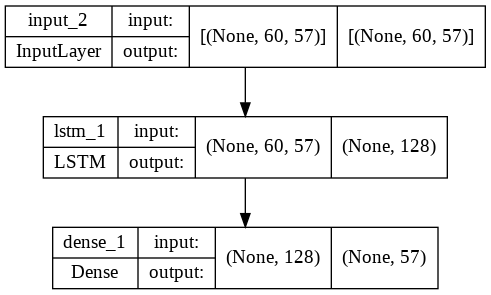

In [21]:
model = build_model(max_len, vocab_size)
plot_model(model, show_shapes=True, show_layer_names=True)

In [22]:
history = model.fit(X, y, epochs=50, batch_size=128)

Epoch 1/50
1565/1565 [==============================] - 266s 167ms/step - loss: 2.5395
Epoch 2/50
1565/1565 [==============================] - 263s 168ms/step - loss: 2.1736
Epoch 3/50
1565/1565 [==============================] - 263s 168ms/step - loss: 2.0461
Epoch 4/50
1565/1565 [==============================] - 263s 168ms/step - loss: 1.9577
Epoch 5/50
1565/1565 [==============================] - 263s 168ms/step - loss: 1.8862
Epoch 6/50
1565/1565 [==============================] - 263s 168ms/step - loss: 1.8277
Epoch 7/50
1565/1565 [==============================] - 262s 167ms/step - loss: 1.7781
Epoch 8/50
1565/1565 [==============================] - 259s 166ms/step - loss: 1.7368
Epoch 9/50
1565/1565 [==============================] - 260s 166ms/step - loss: 1.7010
Epoch 10/50
1565/1565 [==============================] - 262s 167ms/step - loss: 1.6744
Epoch 11/50
1565/1565 [==============================] - 262s 168ms/step - loss: 1.6413
Epoch 12/50
1565/1565 [==================

In [23]:
from google.colab import files

model = model.save('mymodel.hdf5')
files.download('mymodel.hdf5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
model = load_model('/content/mymodel.hdf5')
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 60, 57)]          0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               95232     
                                                                 
 dense_1 (Dense)             (None, 57)                7353      
                                                                 
Total params: 102,585
Trainable params: 102,585
Non-trainable params: 0
_________________________________________________________________


In [25]:
def plot_learning_curve(history):
  loss = history.history['loss']
  epochs = [i for i, _ in enumerate(loss)]
  plt.scatter(epochs, loss, color='skyblue')
  plt.xlabel('Epochs'); plt.ylabel('Cross Entropy Loss')
  plt.show()

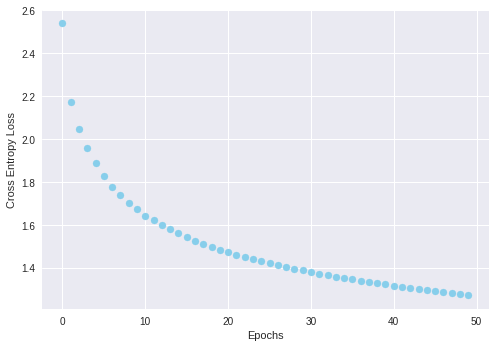

In [26]:
plot_learning_curve(history)

In [13]:
def random_predict(prediction, temperature):
  prediction = np.asarray(prediction).astype('float64')
  log_pred = np.log(prediction) / temperature
  exp_pred = np.exp(log_pred)
  final_pred = exp_pred / np.sum(exp_pred)
  final_pred = final_pred.flatten()
  random_pred = np.random.multinomial(1, final_pred)
  return random_pred

In [14]:
def generate_text(model, data, iter_num, seed, char_dict, temperature=1, max_len=60):
  entire_text = list(data[seed])
  for i in range(iter_num):
    prediction = random_predict(model.predict(np.array([[entire_text[i: i + max_len]]])[0]), temperature)
    entire_text.append(prediction)
  reverse_char_dict = {value: key for key, value in char_dict.items()}
  generated_text = ''
  for char_vec in entire_text:
    index = np.argmax(char_vec)
    generated_text += reverse_char_dict[index]
  return generated_text

In [15]:
type(X)

numpy.ndarray

In [17]:
model.predict(X)

KeyboardInterrupt: ignored

In [ ]:
entire_text = (X[10])
i=0
print(entire_text)
a = np.array(([[entire_text[i: i + max_len]]])[0])
a
model.predict(a)


[[False  True False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False  True False ... False False False]
 [False False False ... False False False]]


array([[2.8086667e-06, 4.9823830e-06, 8.2453617e-09, 1.7567046e-07,
        8.4174870e-05, 2.1358336e-07, 2.3797422e-09, 4.0044455e-08,
        1.8252071e-07, 2.7727154e-07, 3.3603174e-09, 4.7401745e-08,
        1.4057508e-07, 8.3895486e-09, 3.7325037e-08, 5.9279252e-08,
        2.0100467e-08, 7.6987998e-09, 4.4815174e-08, 3.1720578e-08,
        1.5306599e-08, 7.1588047e-09, 8.2322549e-13, 3.3898150e-08,
        7.6192865e-09, 7.9471567e-09, 2.0786779e-10, 1.5508159e-02,
        2.8182052e-08, 1.8357947e-07, 4.4062731e-06, 3.1298392e-02,
        4.0477057e-06, 4.4834723e-09, 7.2955328e-01, 2.6867099e-02,
        2.8248983e-09, 4.7766452e-10, 3.0145460e-05, 4.3924947e-06,
        7.2215196e-05, 1.3632157e-01, 2.5746774e-06, 1.4442659e-08,
        4.7853824e-02, 1.2300913e-04, 1.5389058e-05, 4.8710201e-03,
        1.4708068e-07, 2.7040881e-03, 2.3356579e-07, 4.6718218e-03,
        5.5740279e-09, 7.4044458e-08, 1.4936142e-16, 4.2403715e-07,
        4.9932129e-12]], dtype=float32)

In [19]:
generate_text(model,X,20,3,char_dict)

'\nsupposing that truth is a woman--what then? is there not grouduncy, i mystical '

# Apply Trained model with TURKISH 

- Download TR dataset

In [27]:
!pip install kaggle

In [28]:
!ls 

model.hdf5  model.png  mymodel.hdf5  sample_data


In [29]:
!mkdir ~/.kaggle

In [31]:
!cp kaggle.json ~/.kaggle/

In [32]:
!chmod 600 ~/.kaggle/kaggle.json

In [33]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 3.3 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=6882d025ef446dfe3f9fc6691cc9afef4131c6c01e0e3326dccbb2c90075b0b5
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [34]:
!kaggle datasets download ahmetax/hury-dataset

 28% 5.00M/17.8M [00:00<00:00, 35.8MB/s]
100% 17.8M/17.8M [00:00<00:00, 84.7MB/s]


In [35]:
!unzip hury-dataset.zip

Archive:  hury-dataset.zip
  inflating: dunya-nz.txt            


In [23]:
tr_text = open('/content/dunya-nz.txt').read().lower()
print(tr_text[:25])

iran devlet televizyonu ü


In [27]:
lenght = len(text_data)
lenght

600893

In [28]:
tr_text = tr_text[:lenght]
len(tr_text)

600893

In [29]:
max_len = 60
step = 3
X_tr, y_tr, char_dict_tr = preprocess_split(tr_text, max_len, step)
vocab_size = len(char_dict_tr)
print("Number of sequences: {0}\nNumber of unique characters: {1}".format(len(X_tr), vocab_size))

Number of sequences: 200278
Number of unique characters: 44


In [32]:
def build_model(max_len, vocab_size):
  inputs = layers.Input(shape=(max_len, 44))
  x = layers.LSTM(128)(inputs)
  output = layers.Dense(vocab_size, activation=tf.nn.softmax)(x)
  model = Model(inputs, output)
  model.compile(optimizer='adam', loss=categorical_crossentropy)
  return model

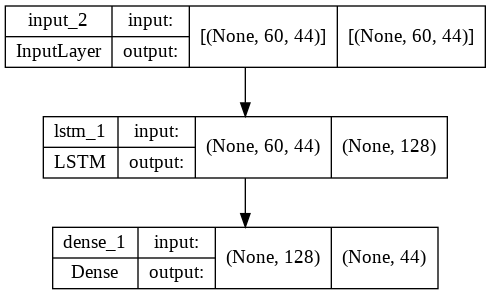

In [35]:
model_tr = build_model(max_len, vocab_size)
plot_model(model_tr, show_shapes=True, show_layer_names=True)

In [37]:
history = model_tr.fit(X_tr, y_tr, epochs=10, batch_size=128)

Epoch 1/10
1565/1565 [==============================] - 272s 173ms/step - loss: 2.4608
Epoch 2/10
1565/1565 [==============================] - 263s 168ms/step - loss: 2.1479
Epoch 3/10
1565/1565 [==============================] - 264s 169ms/step - loss: 2.0380
Epoch 4/10
1565/1565 [==============================] - 264s 169ms/step - loss: 1.9471
Epoch 5/10
1565/1565 [==============================] - 262s 167ms/step - loss: 1.8663
Epoch 6/10
1565/1565 [==============================] - 263s 168ms/step - loss: 1.7985
Epoch 7/10
1565/1565 [==============================] - 263s 168ms/step - loss: 1.7402
Epoch 8/10
1565/1565 [==============================] - 265s 169ms/step - loss: 1.6913
Epoch 9/10
1565/1565 [==============================] - 263s 168ms/step - loss: 1.6495
Epoch 10/10
1565/1565 [==============================] - 261s 167ms/step - loss: 1.6137


In [38]:
generate_text(model_tr,X_tr,20,3,char_dict_tr)

'et televizyonu ülkedeki eyaletin sinde yapılan reformcuları keddi \nazdü pzecelle'